# Project 1 : Regression

### Task : 
Predict the prices of planes,given measurements and classification of certain features they have.

### Solution:
We will train a machine learning algorithm that will predict the price of a plane,given its features.

### Dataset information:
The dataset has 517 observations and 16 predictors:

Model Name : Name of Plane's Model.

Engine Type: Type of engine used in the plane.

HP or lbs thr ea engine: HP or lbs refers to the thrust of an engine, which is the force it produces to propel itself forward.

Max speed Knots: Maximum speed of the plane in knots

Stall Knots dirty: Aircraft is flying at a slower speed (in knots) while configured in a dirty (landing configuration) state, potentially leading to a higher risk of stalling due to the increased drag and altered aerodynamics.

Fuel gal/lbs: Fuel tank capacity.

All eng rate of climb: The "All Engine Rate of Climb" in aviation refers to the vertical speed at which an aircraft can ascend under full power from all of its engines. It's usually measured in feet per minute (ft/min) or meters per second (m/s). This rate indicates the aircraft's capability to climb after takeoff or during flight while maintaining all engines operating at their maximum power.

Eng out rate of climb: The rate of climb in aviation refers to the vertical speed at which an aircraft can ascend under its own power. This rate is typically measured in feet per minute (ft/min) or meters per second (m/s).


Takeoff over 50ft: The "Takeoff over 50ft" feature in aviation refers to the minimum distance required for an aircraft to take off and clear an obstacle that's 50 feet tall. It's an important performance metric, especially in situations where there might be obstructions near the end of the runway or in the flight path.


Empty weight lbs: This is the weight of the plane in lbs when empty.

Length ft/in: The length of the plane in feet and inches for the remainder.

Wing span ft/in : The wingspan of the plane in feet and inches for the remainder.

Price: This is the cost of the plane and our target variable.


# Importing necessary libraries

In [1]:
import joblib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('E:\\Plane Price.csv')
df.head()

Model Name Engine Type HP or lbs thr ea engine  \
0  100 Darter (S.L. Industries)      Piston                     145   
1                   7 CCM Champ      Piston                      85   
2  100 Darter (S.L. Industries)      Piston                      90   
3                    7 AC Champ      Piston                      85   
4  100 Darter (S.L. Industries)      Piston                      65   

  Max speed Knots  Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
0             104                91.0               46.0            36   
1              89                83.0               44.0            15   
2              90                78.0               37.0            19   
3              88                78.0               37.0            19   
4              83                74.0               33.0            14   

  All eng rate of climb  Eng out rate of climb  Takeoff over 50ft  \
0                   450                  900.0             1300.0   
1                   600                  720.0              800.0   
2                   650                  475.0              850.0   
3                   620                  500.0              850.0   
4                   370                  632.0              885.0   

  Landing over 50ft Empty weight lbs Length ft/in Wing span ft/in Range N.M.  \
0             2,050            1,180         25/3            37/5        370   
1             1,350              820         20/7            36/1        190   
2             1,300              810         21/5            35/0        210   
3             1,300              800         21/5            35/0        210   
4             1,220              740         21/5            35/0        175   

       Price  
0  1300000.0  
1  1230000.0  
2  1600000.0  
3  1300000.0  
4  1250000.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

Right off the bat we see a couple of problems with the data.For starters: we see predictors that are clearly numeric
being encoded as objects.The reason most likely is the fact that the numbers are encoded with a comma if greater than 1000.
For example:1180 is written as 1,180.We need to take care of that.Another problem that we see is that there are 10 missing values in our target variable.We need to drop those rows.

In [4]:
df.drop(df[df['Price'].isna()==True].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [5]:
df.head()

Model Name Engine Type HP or lbs thr ea engine  \
0  100 Darter (S.L. Industries)      Piston                     145   
1                   7 CCM Champ      Piston                      85   
2  100 Darter (S.L. Industries)      Piston                      90   
3                    7 AC Champ      Piston                      85   
4  100 Darter (S.L. Industries)      Piston                      65   

  Max speed Knots  Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
0             104                91.0               46.0            36   
1              89                83.0               44.0            15   
2              90                78.0               37.0            19   
3              88                78.0               37.0            19   
4              83                74.0               33.0            14   

  All eng rate of climb  Eng out rate of climb  Takeoff over 50ft  \
0                   450                  900.0             1300.0   
1                   600                  720.0              800.0   
2                   650                  475.0              850.0   
3                   620                  500.0              850.0   
4                   370                  632.0              885.0   

  Landing over 50ft Empty weight lbs Length ft/in Wing span ft/in Range N.M.  \
0             2,050            1,180         25/3            37/5        370   
1             1,350              820         20/7            36/1        190   
2             1,300              810         21/5            35/0        210   
3             1,300              800         21/5            35/0        210   
4             1,220              740         21/5            35/0        175   

       Price  
0  1300000.0  
1  1230000.0  
2  1600000.0  
3  1300000.0  
4  1250000.0

Before we start tackling the poor encoding of some of the numeric features,lets take a quick look at the categoricals

In [6]:
print(f"The number of unique values in 'Model Name' and 'Engine Type',respectively: {len(df['Model Name'].unique())}, {len(df['Engine Type'].unique())} ")

The number of unique values in 'Model Name' and 'Engine Type',respectively: 276, 4 


In [7]:
df['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston'], dtype=object)

We see that there are 276 unique values in the Model Name predictor,which are way too many for such a small dataset,so we're gonna drop those.On the other hand,in the unique values of the Engine Type variable,the same value appears twice:Piston,simply because there were instances where it was spelled with a lower case P,so we'll have to fix that aswell.

In [8]:
df.drop('Model Name',axis=1,inplace=True)
df['Engine Type']=df['Engine Type'].replace('piston','Piston')
df['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet'], dtype=object)

All good,now we move onto the numeric features.We'll have to remove the commas from the numbers where they appear.We also have 
two categories: Length ft/in and Wing span ft/in where there are two numbers entered in the same column:the feet and the remainder of inches to describe the length and wingspan of the plane.We will merge those numbers and just output the result in inches.

In [9]:
df['Empty weight lbs']=df['Empty weight lbs'].apply(lambda x:str(x).replace(',','')).astype(np.float32)
df['Landing over 50ft']=df['Landing over 50ft'].apply(lambda x:str(x).replace(',','')).astype(np.float32)
df['All eng rate of climb']=df['All eng rate of climb'].apply(lambda x:str(x).replace(',',''))
df['HP or lbs thr ea engine']=df['HP or lbs thr ea engine'].apply(lambda x:str(x).replace(',',''))
df['Range N.M.']=df['Range N.M.'].apply(lambda x:str(x).replace(',','')).astype(np.float32)
df.head()

Engine Type HP or lbs thr ea engine Max speed Knots  Rcmnd cruise Knots  \
0      Piston                     145             104                91.0   
1      Piston                      85              89                83.0   
2      Piston                      90              90                78.0   
3      Piston                      85              88                78.0   
4      Piston                      65              83                74.0   

   Stall Knots dirty  Fuel gal/lbs All eng rate of climb  \
0               46.0            36                   450   
1               44.0            15                   600   
2               37.0            19                   650   
3               37.0            19                   620   
4               33.0            14                   370   

   Eng out rate of climb  Takeoff over 50ft  Landing over 50ft  \
0                  900.0             1300.0             2050.0   
1                  720.0              800.0             1350.0   
2                  475.0              850.0             1300.0   
3                  500.0              850.0             1300.0   
4                  632.0              885.0             1220.0   

   Empty weight lbs Length ft/in Wing span ft/in  Range N.M.      Price  
0            1180.0         25/3            37/5       370.0  1300000.0  
1             820.0         20/7            36/1       190.0  1230000.0  
2             810.0         21/5            35/0       210.0  1600000.0  
3             800.0         21/5            35/0       210.0  1300000.0  
4             740.0         21/5            35/0       175.0  1250000.0

Commas are gone,thats a good start.However,there is another problem that wasnt initially obvious.Some of the values in the numeric columns arent actually numeric,but strings.

In [10]:
df['Max speed Knots'].unique()

array(['104', '89', '90', '88', '83', '78', '264', '262', '257', '271',
       '220', '128', '114', '112', '113', '99', '120', '147', '116',
       '109', '97', '117', '85', '168', '148', '136', '130', '126', '122',
       '138', '158', '335', '314', '310', '294', '290', '265', '248',
       '279', '267', '250', '247', '223', '243', '214', '216', '219',
       '208', '200', '246', '249', '204', '203', '209', '186', '178',
       '177', '261', '256', '231', '252', '210', '201', '205', '183',
       '171', '213', '184', '179', '217', '182', '169', '165', '160',
       '181', '170', '145', '140', '137', '127', '123', '110', '106',
       '193', '174', '166', '167', '455', '457', '480', '491', '477',
       '471', '478', '475', '464', '461', '474', '469', '488', '.92 Mach',
       '.85 Mach', '473', '472', '.755 Mach', nan, '.737 Mach',
       '.71 Mach', '295', '263', '245', '240', '235', '239', '232', '230',
       '229', '227', '226', '237', '238', '207', '206', '191', '211',
       '20

We will have to take a look at each of the columns with such a problem as it doesnt appear to be random strings.

## Max speed Knots:
Some of the rows have Mach along with a fraction.1 Mach is about 666 knots,so we have to multiply the fraction by 666 to get to the real value in terms of knots.

In [11]:
def Machsplit(X):
    return float(X.split(" ")[0])*666 if 'Mach' in X.split(" ") else float(X)
df['Max speed Knots']=df['Max speed Knots'].astype(str).apply(Machsplit)
df['Max speed Knots'].unique()

array([104.   ,  89.   ,  90.   ,  88.   ,  83.   ,  78.   , 264.   ,
       262.   , 257.   , 271.   , 220.   , 128.   , 114.   , 112.   ,
       113.   ,  99.   , 120.   , 147.   , 116.   , 109.   ,  97.   ,
       117.   ,  85.   , 168.   , 148.   , 136.   , 130.   , 126.   ,
       122.   , 138.   , 158.   , 335.   , 314.   , 310.   , 294.   ,
       290.   , 265.   , 248.   , 279.   , 267.   , 250.   , 247.   ,
       223.   , 243.   , 214.   , 216.   , 219.   , 208.   , 200.   ,
       246.   , 249.   , 204.   , 203.   , 209.   , 186.   , 178.   ,
       177.   , 261.   , 256.   , 231.   , 252.   , 210.   , 201.   ,
       205.   , 183.   , 171.   , 213.   , 184.   , 179.   , 217.   ,
       182.   , 169.   , 165.   , 160.   , 181.   , 170.   , 145.   ,
       140.   , 137.   , 127.   , 123.   , 110.   , 106.   , 193.   ,
       174.   , 166.   , 167.   , 455.   , 457.   , 480.   , 491.   ,
       477.   , 471.   , 478.   , 475.   , 464.   , 461.   , 474.   ,
       469.   , 488.

## HP or lbs thr ea engine:
There are only 2 non numeric values: 940wet and 1000dry.We will just manually replace them.In a larger dataset we could get away with dropping values like this but here its just two of them.

In [12]:
df['HP or lbs thr ea engine'].replace('940wet','940',inplace=True)
df['HP or lbs thr ea engine'].replace('1000 dry','1000',inplace=True)
df['HP or lbs thr ea engine']=df['HP or lbs thr ea engine'].astype(np.float32)

In [13]:
df['HP or lbs thr ea engine'].unique()

array([  145.,    85.,    90.,    65.,   350.,   290.,   600.,   450.,
         300.,   275.,   245.,   220.,   100.,   150.,   115.,    60.,
         160.,   180.,   108.,   750.,  1050.,  1200.,   850.,   715.,
         680.,   550.,   500.,   380.,   340.,   295.,   260.,   325.,
         310.,   285.,   250.,   240.,   225.,   205.,   196.,   185.,
         200.,   165.,   230.,   190.,  3700.,  8650.,  7500.,  3500.,
        2950.,  2850.,  6400.,  4000.,  3650.,  3400.,  2500.,  2820.,
        1900.,  2200.,   625.,   375.,   210.,   675.,   235.,   175.,
         195.,   110.,  1846.,   270.,   265.,  4750.,  4500.,  5200.,
        4125.,  4250.,  4315.,  3230.,   620.,   579.,   135.,   700.,
         900.,   400.,  1000.,   940.,   840.,   665., 14750., 13850.,
       11400.,  1950.,  3750.,  3360.,  3100.,   120.,  3300.,   967.,
        2900.,   778.,   727.,   724.,   776.,   705.,   605.,   280.,
         217.,   720.], dtype=float32)

## All eng rate of climb
Some rows have w/3bld in them for some reason.We'll remove that.


In [14]:
def Allsplit(X):
    return float(X.split(" ")[0]) if 'w/3bld' in X.split(" ") else float(X)

df['All eng rate of climb']=df['All eng rate of climb'].apply(Allsplit)
df['All eng rate of climb'].unique()

array([ 450.,  600.,  650.,  620.,  370.,  360., 1820., 1755., 1460.,
       1700., 1800., 1600., 1060.,  990.,  700.,  496.,  435.,  640.,
        550., 1000., 1120., 1140., 1145.,  800.,  725.,  400., 1160.,
        850.,  660.,  705.,  765., 1500.,  900., 1740., 3225., 2979.,
       2437., 2450., 1963., 2200., 2455., 2380., 1870., 2137., 1955.,
       2000., 1900., 1275., 1585., 1300., 1375., 1601., 1615., 1400.,
       1410., 1250., 1190., 1270., 1320., 1450., 1475., 1529., 1424.,
       1461., 1750., 1660., 2020., 1682., 1670., 1693., 1630., 1248.,
       1049., 1165., 1210., 1030., 1015., 1225., 1167., 1136., 1200.,
       1150., 1170., 1100.,  890.,  950.,  930.,  980.,  960., 1010.,
        927.,  891.,  862.,  880.,  792.,  728.,  720.,  680., 1085.,
       1840., 4059., 4380., 4200., 3400., 4340., 5100., 4760., 6110.,
       6350., 6830., 6050., 7100., 7220., 6800., 6900., 6300., 3720.,
       4442., 1520., 3699., 3909., 4500., 3000., 3370., 3625., 2460.,
       3311., 2719.,

## Landing over 50ft:
It only has 1 row value called Orig,which we will simply set as nan.

In [15]:
df['Landing over 50ft'].replace('Orig','nan',inplace=True)

##  Length ft/in
For this column we are going to first split the feet and inches,then replace any letters with nan values and multiply feet by 12 and add it to inches.The final column will have Length of the plane in terms of inches.

In [16]:
feet=df['Length ft/in'].apply(lambda x:x.split('/')[0]).replace('N',np.nan).astype(np.float32)
inches=df['Length ft/in'].apply(lambda x:x.split('/')[1]).replace('C',np.nan).astype(np.float32)
df['Lengthinches']=feet*12 +inches
df.drop('Length ft/in',axis=1,inplace=True)


## Wingspan ft/in
Here we proceed in the same way as Length.

In [17]:
feet=df['Wing span ft/in'].apply(lambda x:x.split('/')[0]).replace('N',np.nan).astype(np.float32)
inches=df['Wing span ft/in'].apply(lambda x:x.split('/')[-1]).replace('C',np.nan).astype(np.float32)
df['Wingspaninches']=feet*12 +inches
df.drop('Wing span ft/in',axis=1,inplace=True)

Everything Looks good,next we proceed with EDA.

# EDA
Let's start out by making scatter plots of each predictor against the target.

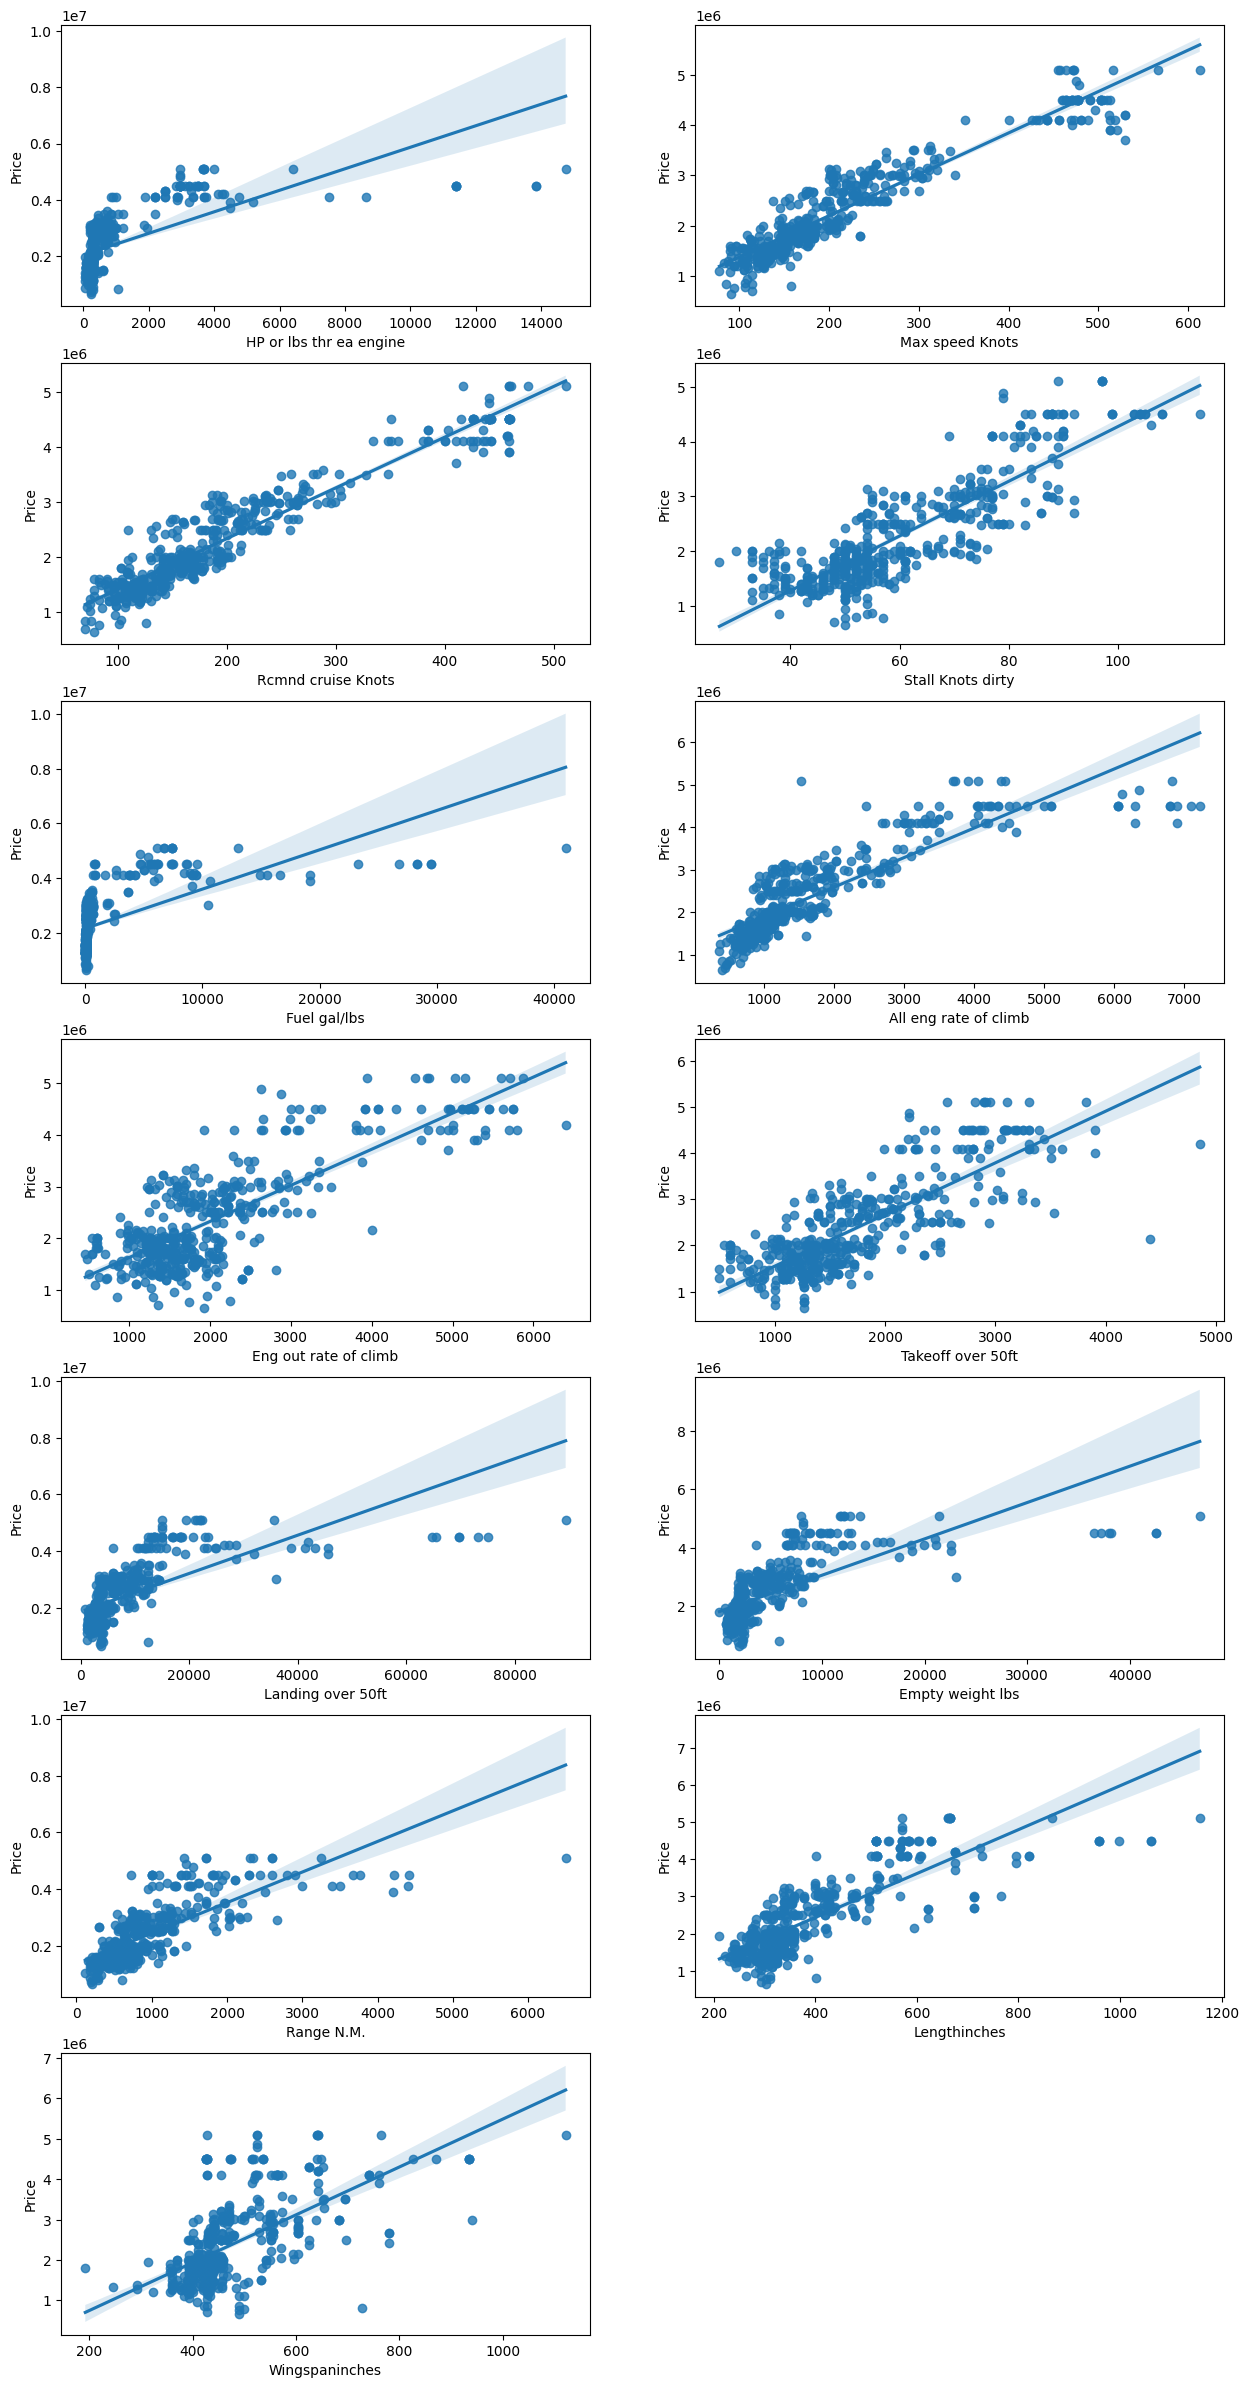

In [18]:
fig,ax=plt.subplots(7,2,figsize=(15,30))
for i,col in enumerate(df.drop(['Engine Type','Price'],axis=1)):
    sns.regplot(data=df,x=df[col].name,y='Price',ax=ax[i//2,i%2])
fig.delaxes(ax[-1, -1])    

We see very strong linear relationships between the predictors and the target in the scatterplots.It looks like some of the features even have a slightly non linear relationship.Perhaps we could experiment by adding some polynomial features later.Let's check out the correlation matrix.

In [19]:
fig=px.imshow(df.drop('Engine Type',axis=1).corr(),aspect='auto',text_auto=True,height=1000,width=1000)
fig.update_layout(title_text='Correlation Matrix', title_x=0.5)
fig.show()

Yes,most features have high correlation with Price,however they also correlate with each other alot.If that causes problems with the model,we'll deal with it later.Now lets plot the densities of the features and the target.

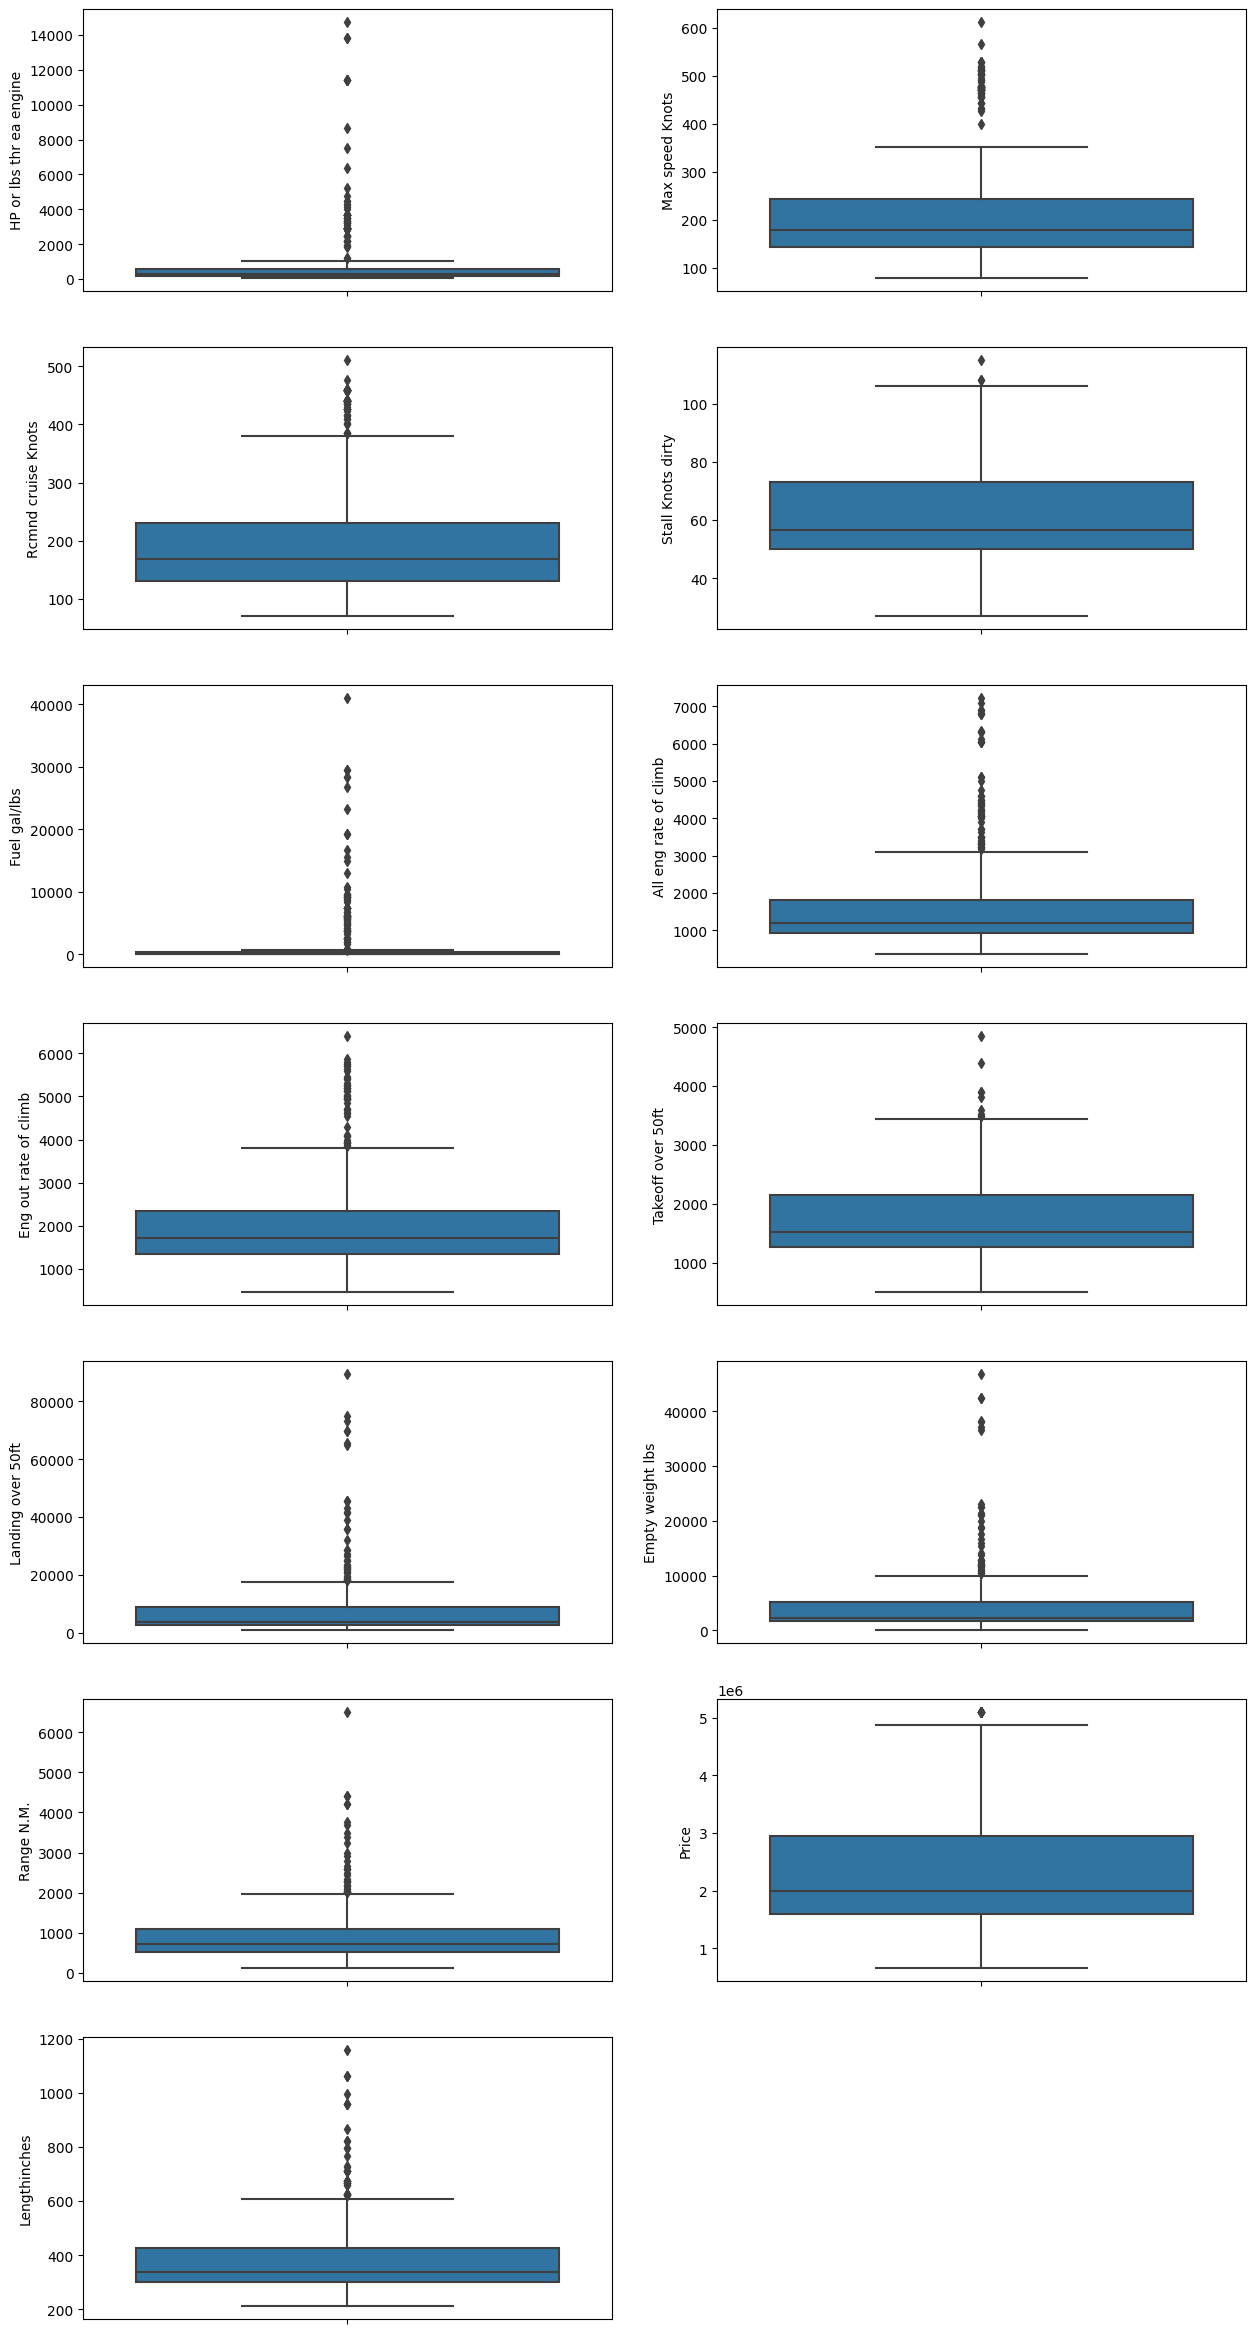

In [20]:
fig,ax=plt.subplots(7,2,figsize=(15,30))
for i,col in enumerate(df.drop(['Engine Type'],axis=1)):
    sns.boxplot(y=df[col],ax=ax[i//2,i%2])
fig.delaxes(ax[-1, -1]) 

There seem to be quite a few observations that could be classified as outliers.We'll see how we deal with that later.

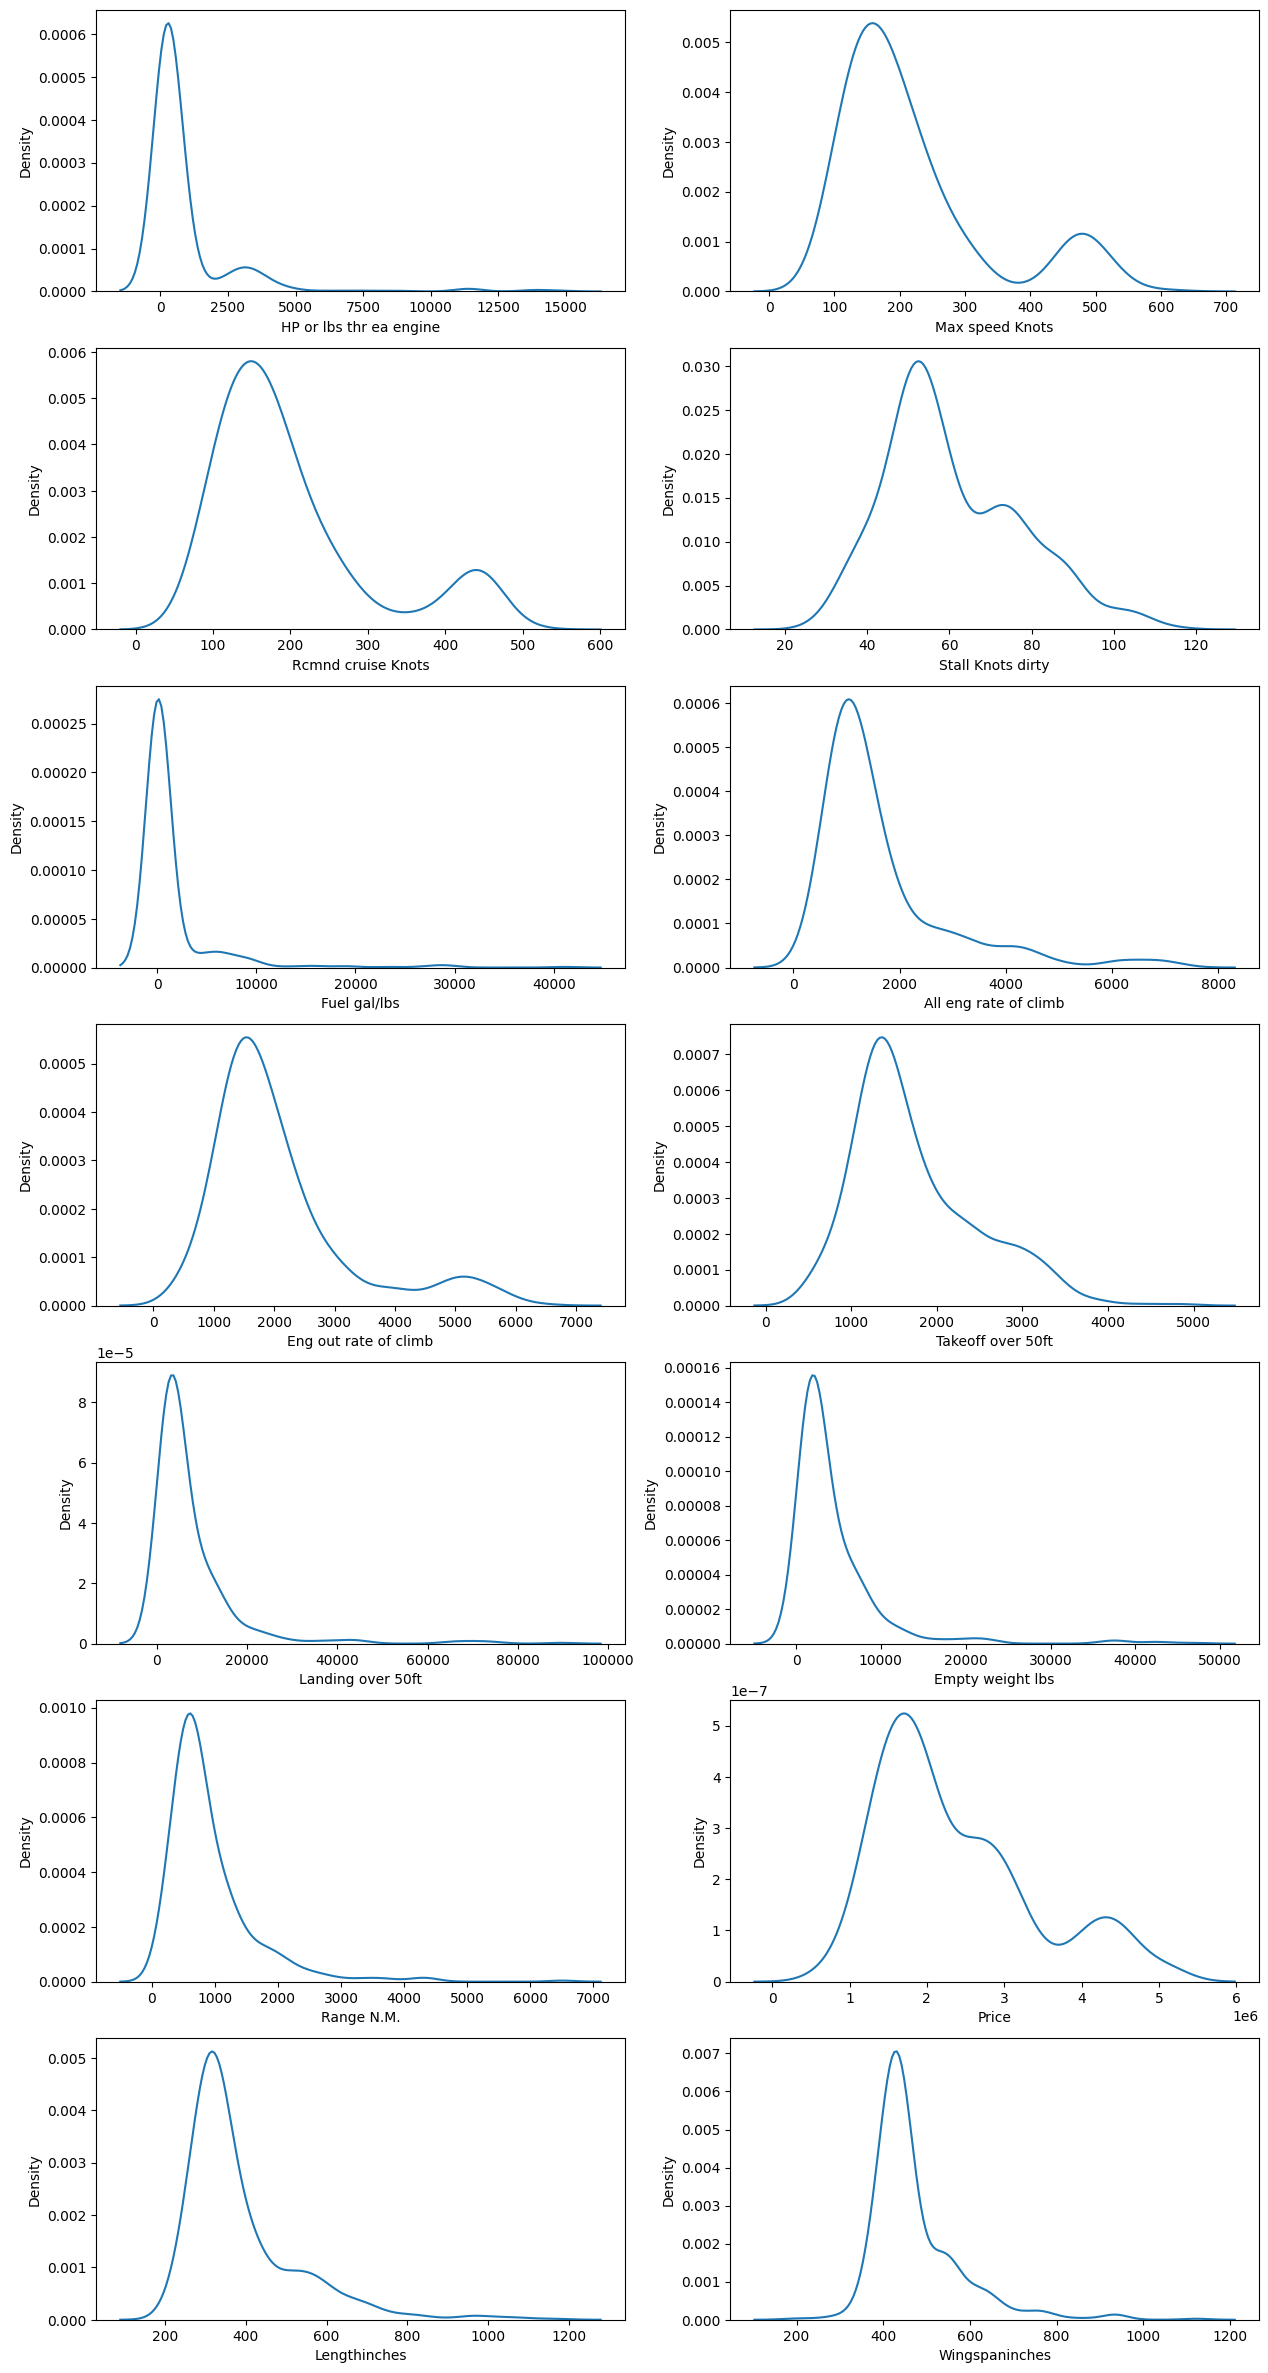

In [21]:
fig,ax=plt.subplots(7,2,figsize=(15,30))
for i,col in enumerate(df.drop(['Engine Type'],axis=1)):
    sns.kdeplot(x=df[col],ax=ax[i//2,i%2])

Most features seem to have a pretty skewed distribution.Perhaps its better to impute missing values with the median.Now lets check out our categorical variable.Let's plot the densities of the target's distribution with respect to each of the three categories.

<Axes: xlabel='Price', ylabel='Density'>

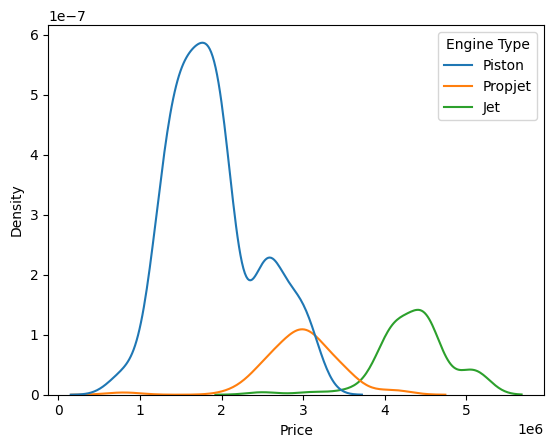

In [22]:
sns.kdeplot(data=df,x='Price',hue='Engine Type')

Looks like there is a major difference between the distributions.Jet planes seem to be way more expensive than the others.This will be a useful feature.

# Preparing data for training
Since we dont want any data leakage to occur,it would probably be best to split the data into train and test right now.

In [23]:
y=df['Price']
df.drop('Price',axis=1,inplace=True)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=1)

We have split the data into train and test,20 % of the data was stored for the test set and we have a random seed set so that we can reproduce the results.First off,we'll start encoding our categorical variable.For that,we will use OnehotEncoder.We will also drop one of the features we create to avoid multicolinearity issues.

In [25]:
def enctransform(df,enc,cols):
    """This function takes a dataframe,a fit encoder and a list of columns to transform with said encoder,transforms
       them,merges them with the dataframe and then removes the no longer needed column from the dataframe 
    """
    for col in cols:
        encoded_features_df=pd.DataFrame(encoder.transform(df[[col]]),columns=encoder.get_feature_names_out(),index=df.index)
        df=pd.concat([df,encoded_features_df],axis=1)
        df.drop(col,axis=1,inplace=True)
    return df

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(categories='auto',handle_unknown='ignore',drop='first',sparse_output=False)
encoder.fit(X_train[['Engine Type']])
X_train=enctransform(X_train,encoder,['Engine Type'])
X_test=enctransform(X_test,encoder,['Engine Type'])
X_train.head()

HP or lbs thr ea engine  Max speed Knots  Rcmnd cruise Knots  \
42                     750.0            138.0               130.0   
58                     550.0            223.0               216.0   
386                    700.0            300.0               291.0   
78                     275.0            178.0               161.0   
425                   3360.0            443.0               385.0   

     Stall Knots dirty  Fuel gal/lbs  All eng rate of climb  \
42                57.0           190                 1740.0   
58                77.0           384                 1900.0   
386               61.0          1887                 2380.0   
78                60.0           134                 1450.0   
425               79.0          9100                 4150.0   

     Eng out rate of climb  Takeoff over 50ft  Landing over 50ft  \
42                     NaN                NaN             6000.0   
58                  2150.0             1960.0             9300.0   
386                 1591.0             2034.0             6579.0   
78                  1260.0             1375.0             6000.0   
425                 3800.0             2450.0            22700.0   

     Empty weight lbs  Range N.M.  Lengthinches  Wingspaninches  \
42             3600.0       545.0         396.0           533.0   
58             5680.0      1160.0         426.0           541.0   
386            4050.0      1563.0         419.0           499.0   
78             3956.0       726.0         377.0           542.0   
425           12000.0         NaN         569.0           564.0   

     Engine Type_Piston  Engine Type_Propjet  
42                  0.0                  1.0  
58                  0.0                  1.0  
386                 0.0                  1.0  
78                  1.0                  0.0  
425                 0.0                  0.0

Looks fine,now its time to handle the missing data imputation.To do that, we will use the Simple imputer from sklearn and impute the missing values with the median.

In [27]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train=pd.DataFrame(imputer.transform(X_train),columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns,index=X_test.index)
print(f"Total number of missing values for the Train and Test set,respectively:{X_train.isna().sum().sum()},{X_test.isna().sum().sum()}")

Total number of missing values for the Train and Test set,respectively:0,0


# Training
For training we will use standard linear regression.Before the final fit however,we will try to identify the outliers using studentized residuals and eliminate those with a value >3 from our train set.We will also add polynomial features of degree 2 to a few of our predictors.

In [28]:
#First we reset the index of X_train and y_train since it's all over the place from the split of the data.
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)


#Now we fit OLS linear regression to identify the studentized residuals,OLS from statsmodels requires a design matrix to be passed
#during the fit,so we will add a constant of ones to X_train.
ols_reg=sm.OLS(y_train.reset_index(drop=True),sm.add_constant(X_train)).fit()
inf=ols_reg.get_influence()
student_resid_index=np.argwhere(abs(inf.resid_studentized_external>3)).flatten()
y_train.drop(student_resid_index,inplace=True)
X_train.drop(student_resid_index,inplace=True)


#Then we add polynomial versions of degree 2 of some of the features we observed to have some nonlinearity from the scatter plots.
poly=PolynomialFeatures(degree=2)
cols_to_transform=['Takeoff over 50ft','Eng out rate of climb','All eng rate of climb','Max speed Knots','Rcmnd cruise Knots']
poly.fit(X_train[cols_to_transform])
X_train_poly=pd.DataFrame(poly.transform(X_train[cols_to_transform]),columns=poly.get_feature_names_out(),index=X_train.index)
X_test_poly=pd.DataFrame(poly.transform(X_test[cols_to_transform]),columns=poly.get_feature_names_out(),index=X_test.index)
X_train=pd.concat([X_train,X_train_poly],axis=1)
X_test=pd.concat([X_test,X_test_poly],axis=1)


Now its finally time to train our linear regression and evaluate our model.

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"R^2 on the test set: {r2_score(y_test,y_pred):.2f}")
print(f"RMSE on the test set: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")

R^2 on the test set: 0.92
RMSE on the test set: 287298.25


Results are pretty good,it would appear that our model explains about 92 % of the variability of the target in our test set.
The RMSE indicates that on average when we predict an observation,we would expect to be off by about 287000 $.

Finally,to make sure our results werent just pure luck,we will perform a 10-fold cross validation,running the training data through the same transformations on each split and evaluating on the test set.Just so our code isnt too dirty,should make a Pipeline to take the training and testing data through the necessary transformation.We'll need that later for the deployment anyway.

In [30]:
regular_num_cols=df.select_dtypes('number').columns.drop(cols_to_transform)
categorical_cols=df.select_dtypes('O').columns
numerical_imputer=SimpleImputer(strategy='median')


poly_original=Pipeline([('impute',numerical_imputer)])
poly_transform=Pipeline([('impute',numerical_imputer),('poly',PolynomialFeatures(degree=2))])
categorical_transformer=Pipeline([('encoder',OneHotEncoder(handle_unknown='ignore',drop='first'))])
regular_num_transformer=Pipeline([('impute',numerical_imputer)])
final_transformer=ColumnTransformer([('poly_orig',poly_original,cols_to_transform),
                                    ('poly',poly_transform,cols_to_transform),
                                    ('categorical',categorical_transformer,categorical_cols),
                                    ('regular',regular_num_transformer,regular_num_cols)],remainder='passthrough')




final_pipeline=Pipeline([('final',final_transformer),
                        ('model',LinearRegression())])

In [31]:
def outlier_removal(X_train,y_train):
    """ This function is going to take in the train set,transform it using our predefined Column transformer,
        identify the outliers using studentized residuals and remove them. 
    """
    X_train.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True,inplace=True)
    X_outliers=pd.DataFrame(final_transformer.fit_transform(X_train))
    ols_reg=sm.OLS(y_train,sm.add_constant(X_outliers)).fit()
    inf=ols_reg.get_influence()
    student_resid_index=np.argwhere(abs(inf.resid_studentized_external>3)).flatten()
    y_train.drop(student_resid_index,inplace=True)
    X_train.drop(student_resid_index,inplace=True)
    return X_train,y_train

Now whenever we fit the model,it'll impute the missing values,create the polynomial features and encode categorical data,it'll also do so with the testing data.Time to test the model with 10-fold cross-validation.

In [32]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True,random_state=1)
scores=[]
for k_fold,(train_idx,test_idx) in enumerate(kf.split(df,y)):
    X_train,y_train=df.loc[train_idx],y.loc[train_idx]
    X_test,y_test=df.loc[test_idx],y.loc[test_idx]
    
    X_train,y_train=outlier_removal(X_train,y_train)

    model=final_pipeline.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"R^2 on the test set for fold # {k_fold+1}: {r2_score(y_test,y_pred):.3f}")
    scores.append(r2_score(y_test,y_pred))
print('-----------------------------------------------')
print(f"Mean r^2 for all folds: {np.mean(scores):.3f}")

R^2 on the test set for fold # 1: 0.889
R^2 on the test set for fold # 2: 0.937
R^2 on the test set for fold # 3: 0.863
R^2 on the test set for fold # 4: 0.932
R^2 on the test set for fold # 5: 0.871
R^2 on the test set for fold # 6: 0.946
R^2 on the test set for fold # 7: 0.930
R^2 on the test set for fold # 8: 0.834
R^2 on the test set for fold # 9: 0.882
R^2 on the test set for fold # 10: 0.877
-----------------------------------------------
Mean r^2 for all folds: 0.896


Not bad,our model seems pretty stable,regardless of how we split the data.Let's plot the residuals now.

Text(0, 0.5, 'Residuals')

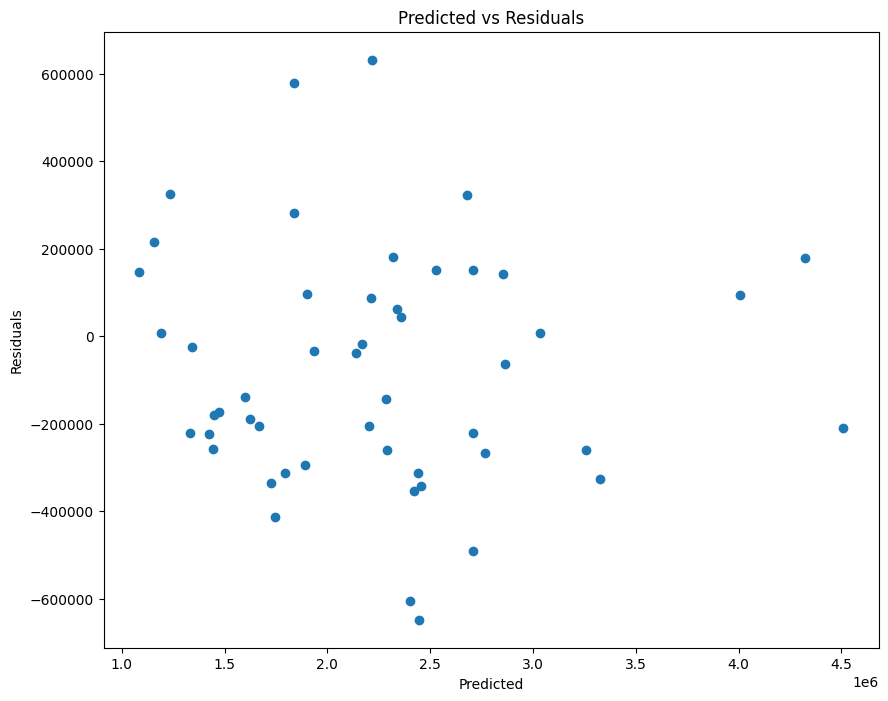

In [33]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(model.predict(X_test),y_test-model.predict(X_test))
plt.title(label='Predicted vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

There doesnt seem to be any noticable pattern,which means that what our model fails to predict seems to occur at random,which is good.We dont want our model to try and fit to the noise as that would cause it to overfit.Well,now all that's left is to fit the model to the entire dataset after removing the outliers and to deploy it.

In [34]:
df,y=outlier_removal(df,y)

In [35]:
model.fit(df,y)

Pipeline(steps=[('final',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('poly_orig',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Takeoff over 50ft',
                                                   'Eng out rate of climb',
                                                   'All eng rate of climb',
                                                   'Max speed Knots',
                                                   'Rcmnd cruise Knots']),
                                                 ('poly',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures())]...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Engine Type'], dtype='object')),
                                                 ('regular',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['HP or lbs thr ea engine', 'Stall Knots dirty', 'Fuel gal/lbs',
       'Landing over 50ft', 'Empty weight lbs', 'Range N.M.', 'Lengthinches',
       'Wingspaninches'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [36]:
joblib.dump(model,'model.joblib')

['model.joblib']